<a href="https://colab.research.google.com/github/Rugiyya1/Music_genre_classification_with_PCA/blob/main/Music_Genre_Classification_with_PCA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [254]:
data = pd.read_csv('/content/music_dataset_mod.csv')
df=data.copy()
df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [256]:
df.describe(include='object')

,Genre
count,890
unique,5
top,Rock
freq,190


In [257]:
df.shape

(1000, 13)

In [258]:
df.isnull().sum() ## checking null values

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [259]:
df['Genre'].unique() #checking classes names

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

<Axes: xlabel='Genre', ylabel='count'>

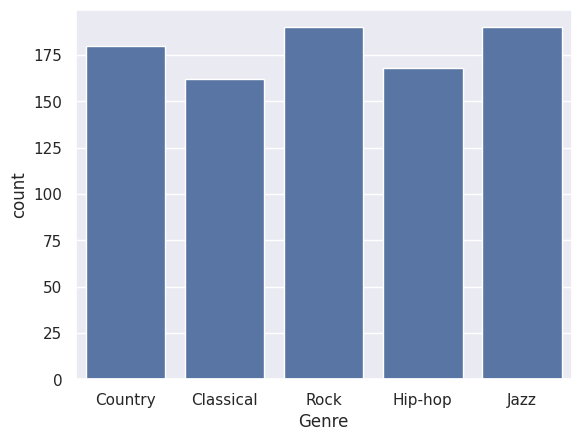

In [260]:
sns.countplot(data=df, x ='Genre')

- Dropping null values in Genre column
- splitting the data into tarining and test
- transforming categorical variables into numerical ones

In [261]:
## Dropping null values
df_nnull=df.dropna()
df_nnull.shape

(890, 13)

In [269]:
## split data

X = df_nnull.drop('Genre', axis=1)
y=df_nnull['Genre']


In [270]:
## Encoding the target

label_encoder = LabelEncoder()

y_enc = label_encoder.fit_transform(y)




In [271]:
y = pd.DataFrame(y_enc)


<Axes: >

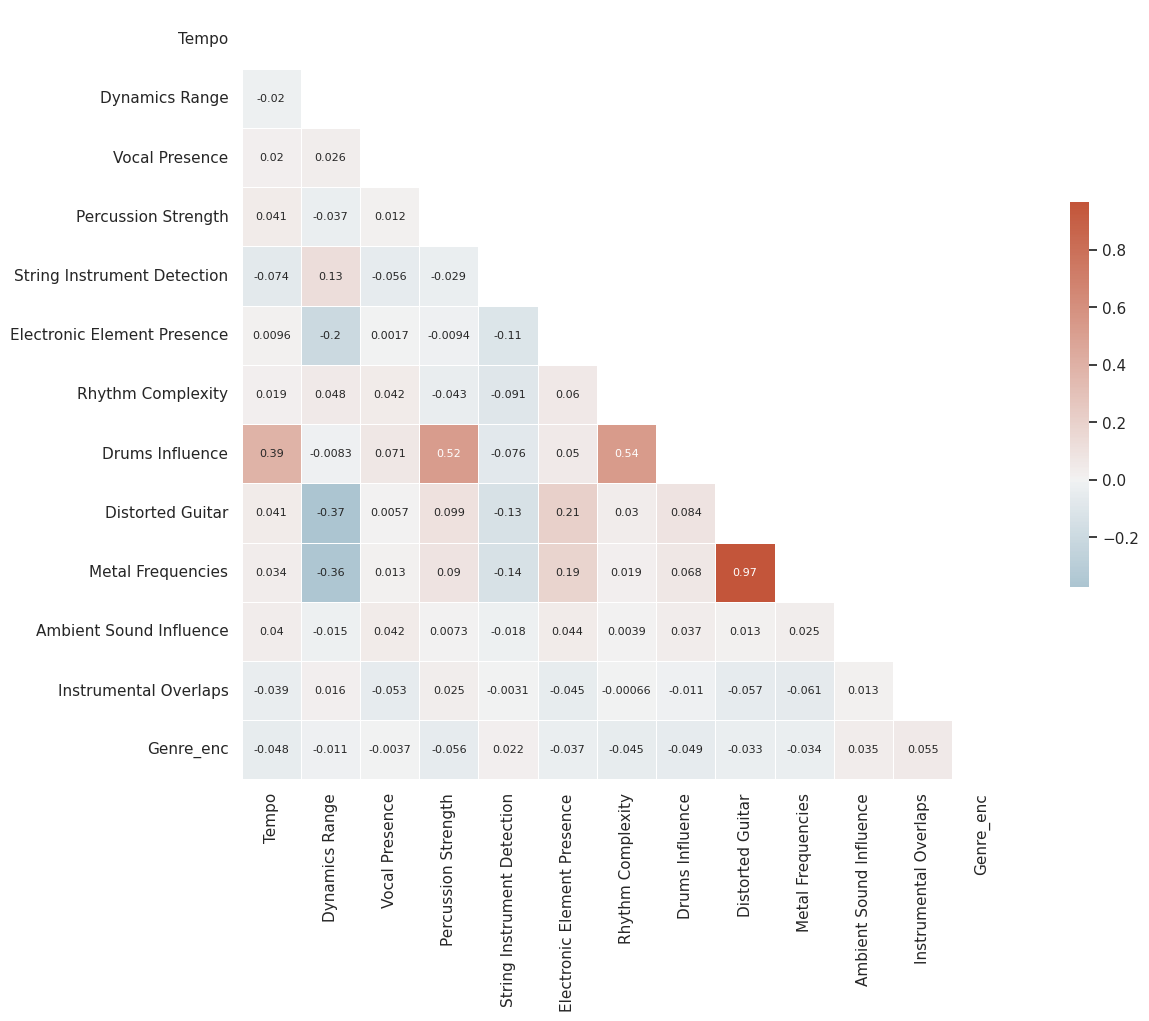

In [265]:
## Correlation matrix for full dataset

df_full=X

df_full['Genre_enc'] = y

sns.set_theme(style='white')

corr =df_full.corr()

mask = np.triu(np.ones_like(corr, dtype =bool))

f,ax = plt.subplots(figsize=(15, 10))

cmap =sns.diverging_palette(230,20, as_cmap =True)


sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

In [272]:
## Scaling data

scaler=StandardScaler()

X_scaled = scaler.fit_transform(X)


In [273]:
## Creating PCA class
pca = PCA()

X_pca=pca.fit_transform(X_scaled)


In [274]:
## anlayzing explained variance ratio

pca.explained_variance_ratio_

array([0.20063071, 0.15062807, 0.09369199, 0.08696907, 0.08536054,
       0.08167379, 0.07948271, 0.07613474, 0.07000221, 0.05996203,
       0.01267309, 0.00279105])

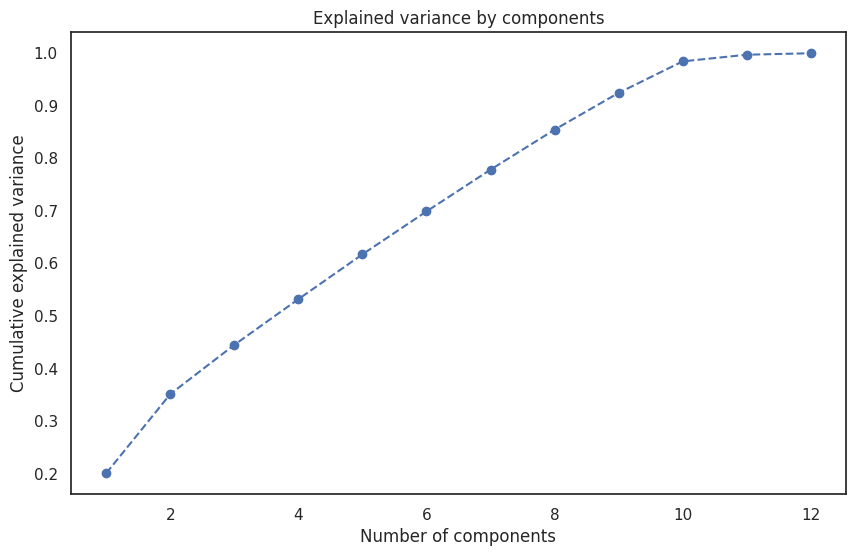

In [275]:
#plotting cumulative variance
plt.figure(figsize=(10,6))
plt.plot(range(1,13),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [276]:
#based on above plot min 80% variance is achieved with 8 components
pca = PCA(n_components=8)
X_pca=pca.fit_transform(X_scaled)

In [277]:
# Split the dataset into training and testing part

X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size=0.3,random_state=42)

In [278]:
model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [279]:
y_pred = model.predict(X_test)

In [280]:
accuracy_score(y_test, y_pred)

0.5355805243445693

In [301]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [282]:
# Split the dataset into training and testing part

X_tr, X_te, y_tr, y_te = train_test_split(X_scaled,y, test_size=0.3,random_state=42)

In [283]:
model2 = LogisticRegression(max_iter=10000)

model2.fit(X_tr, y_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [284]:
y_pred2 = model2.predict(X_te)

In [285]:
accuracy_score(y_te, y_pred2)

0.5280898876404494

In [302]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [287]:
df_null = df[df['Genre'].isnull()]

In [288]:
df_null =df_null.drop('Genre', axis=1)
df_null

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399
...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283


In [289]:
df_scaled = scaler.transform(df_null)

In [290]:
df_pca = pca.transform(df_scaled)

In [291]:
predict = model.predict(df_pca)

In [292]:
predict

array([0, 1, 1, 4, 4, 3, 3, 3, 4, 3, 3, 2, 4, 3, 4, 1, 4, 3, 2, 4, 2, 4,
       0, 3, 1, 3, 0, 2, 0, 3, 0, 1, 3, 4, 4, 4, 1, 0, 2, 1, 3, 0, 0, 1,
       4, 1, 2, 3, 0, 3, 1, 3, 0, 1, 4, 1, 2, 4, 1, 3, 2, 0, 0, 0, 1, 4,
       3, 0, 1, 1, 3, 1, 3, 4, 0, 4, 3, 3, 1, 1, 3, 0, 4, 0, 0, 4, 0, 1,
       2, 4, 0, 4, 4, 0, 4, 4, 0, 1, 0, 3, 2, 3, 2, 4, 3, 2, 4, 2, 2, 0])

In [293]:
genre = label_encoder.inverse_transform(predict)

In [294]:
genre

array(['Classical', 'Country', 'Country', 'Rock', 'Rock', 'Jazz', 'Jazz',
       'Jazz', 'Rock', 'Jazz', 'Jazz', 'Hip-hop', 'Rock', 'Jazz', 'Rock',
       'Country', 'Rock', 'Jazz', 'Hip-hop', 'Rock', 'Hip-hop', 'Rock',
       'Classical', 'Jazz', 'Country', 'Jazz', 'Classical', 'Hip-hop',
       'Classical', 'Jazz', 'Classical', 'Country', 'Jazz', 'Rock',
       'Rock', 'Rock', 'Country', 'Classical', 'Hip-hop', 'Country',
       'Jazz', 'Classical', 'Classical', 'Country', 'Rock', 'Country',
       'Hip-hop', 'Jazz', 'Classical', 'Jazz', 'Country', 'Jazz',
       'Classical', 'Country', 'Rock', 'Country', 'Hip-hop', 'Rock',
       'Country', 'Jazz', 'Hip-hop', 'Classical', 'Classical',
       'Classical', 'Country', 'Rock', 'Jazz', 'Classical', 'Country',
       'Country', 'Jazz', 'Country', 'Jazz', 'Rock', 'Classical', 'Rock',
       'Jazz', 'Jazz', 'Country', 'Country', 'Jazz', 'Classical', 'Rock',
       'Classical', 'Classical', 'Rock', 'Classical', 'Country',
       'Hip-hop', '

In [295]:
## Replacing null values in original dataset with predicted values

df.loc[df['Genre'].isnull(), 'Genre'] = genre

In [300]:
df.tail(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
990,145.665597,28.642070,52.657254,7.204516,94.165273,7.130571,78.159682,73.616978,94.777354,93.121865,46.236654,77.689609,Jazz
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Hip-hop
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock
999,71.050781,32.967250,62.875776,78.868747,88.094454,59.148014,83.420324,59.582109,37.329193,44.576693,87.458414,78.270683,Jazz


In [298]:
df.isnull().sum()

Tempo                          0
Dynamics Range                 0
Vocal Presence                 0
Percussion Strength            0
String Instrument Detection    0
Electronic Element Presence    0
Rhythm Complexity              0
Drums Influence                0
Distorted Guitar               0
Metal Frequencies              0
Ambient Sound Influence        0
Instrumental Overlaps          0
Genre                          0
dtype: int64

In [299]:
label_encoder.classes_

array(['Classical', 'Country', 'Hip-hop', 'Jazz', 'Rock'], dtype=object)